# COMP1801 Tutorial Week 9 - Convolutional Neural Networks
*Dr Peter Soar - 2023/24*

Credit: Much of this tutorial has been taken and modified from tutorials produced in previous years by Dr Stef Garasto & Dr Dimitris Kollias for the module COMP1804.
$\newcommand{\Vec}[1]{\boldsymbol{#1}}$
$\newcommand{\Mat}[1]{\boldsymbol{#1}}$

This tutorial is an expansion of last weeks introduction into Neural Networks that explores how we can use so called Convolutional Neural Networks (CNNs). While they have applications in other domains, CNNs are most famous for being the standard method for computer vision classification problems. We will some methods for loading image data into google colab, how to construct a CNN, applying transfer learning to your problems and how to use data augmentation to make your models more robust.

For this tutorial, read through and try to understand the text and code examples I have provided (ask your tutor if you have any questions) and there will be a selection of exercises. Attempt these exercises on your own, but do ask your tutor for help if you get stuck.

### Note: USE **GOOGLE COLAB** (not offline environments) to use Tensorflow.

*   Tensorflow enables you to leverage GPUs.
*   Installing Tensorflow to your laptop/PC may cause technical problems.
*   **Ensure runtime is changed to GPU** to accelerate execution speed.

#0. Do not forget to import all the Python Libraries being used!

In [ ]:
import numpy as np # A useful package for dealing with mathematical processes, we will be using it this week for vectors and matrices.
import pandas as pd # A common package for viewing tabular data
import matplotlib.pyplot as plt # We will be using Matplotlib for our graphs
import os # we use this to oad things from the local file system
from sklearn.model_selection import train_test_split # A library that can automatically perform data splitting for us
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, classification_report, balanced_accuracy_score # Various classification metrics we may find useful

import tensorflow as tf # loads all of tensorflow. This gives us access to everything, but we need to call the correct library
from tensorflow import keras # karas is a hgiher level library built on tensorflow. Most of what we are doing is actually using keras.
from tensorflow.keras import layers, datasets # Import the different model layers and datasets
import tensorflow_datasets as tfds # An alternate way to load tensorflow datasets
from tensorflow.keras.preprocessing.image import load_img, img_to_array # Some tensofrlow preprocessing librarie we need to load in local image files
from keras.models import Model # We'll be using the functional/graphical api for our CNNs
%matplotlib inline

#1. Importing Image Data

When it comes to loading in image data to google colab there are a number of different methods that can be used depending on where the data is hosted and how it has been stored and/or labelled. While I have already provided some information about this in previous tutorials (See week 1 and week 8 where there are some short sections discussing images), in this section I am going to provide some examples of how we can load in image datasets in a few differnt scenarios.

##1.1 Loading Local Image Data

First I want to demonstrate how we load in images that we have stored locally - that is to say that we have the entire dataset stored somewhere on our computer. While not always viable with some larger datasets, often this will be how you have to interface with your image data for real tasks - this is also the case for your coursework data!




###1.1.1 Images with Metadata

One way your images could be stored and labelled is to have a 'metadata' file that links the image names to the class label. This approach  generally means all of your images will be mixed together in a single directory, and also provides a way of combining additional tabular data with your image.


Note: This method loads the entire image dataset into memory, which should be fine for a small set like this, but for larger problems you may want to look into [data generators](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator).

For an example of this, take the `shapes_dataset_meta.zip` file I provided on moodle and upload it to your colab work space (don't unzip it first!). We can then use this `!unzip` command to extract these files inside colab, where we can start using them.

In [ ]:
!unzip shapes_dataset_meta.zip

Archive:  shapes_dataset_meta.zip
   creating: shapes_dataset_meta/
  inflating: shapes_dataset_meta/metadata.csv  
   creating: shapes_dataset_meta/shapes/
  inflating: shapes_dataset_meta/shapes/image1.png  
  inflating: shapes_dataset_meta/shapes/image10.png  
  inflating: shapes_dataset_meta/shapes/image100.png  
  inflating: shapes_dataset_meta/shapes/image1000.png  
  inflating: shapes_dataset_meta/shapes/image101.png  
  inflating: shapes_dataset_meta/shapes/image102.png  
  inflating: shapes_dataset_meta/shapes/image103.png  
  inflating: shapes_dataset_meta/shapes/image104.png  
  inflating: shapes_dataset_meta/shapes/image105.png  
  inflating: shapes_dataset_meta/shapes/image106.png  
  inflating: shapes_dataset_meta/shapes/image107.png  
  inflating: shapes_dataset_meta/shapes/image108.png  
  inflating: shapes_dataset_meta/shapes/image109.png  
  inflating: shapes_dataset_meta/shapes/image11.png  
  inflating: shapes_dataset_meta/shapes/image110.png  
  inflating: shapes_d

We can then run a loop that combines our image data (as a matrix of RGB values) with our labels into a single array, joining based on teh file name.

Note: Because I am using google colab, I am having to refer to the google colab file system. If you are using python on your local machine then the directories would need to be changed to point at where the images are stored on you local file system.

In [ ]:

# Load metadata from the CSV file - this allows us to know what class each picture belongs to.
metadata = pd.read_csv("shapes_dataset_meta/metadata.csv")

# Define the directory where your images are located (in colab in our case)
image_directory = "shapes_dataset_meta/shapes"

# Define image size - this means we can rescale all our images to be the same size
image_size = (100, 100)

# Create lists to store image data and labels
images = []
labels = []

# Load and preprocess images
for index, row in metadata.iterrows():
    image_path = os.path.join(image_directory, row['image_name'])
    image = load_img(image_path, target_size=image_size)
    image_array = img_to_array(image) / 255.0  # Normalize pixel values to [0, 1]
    images.append(image_array)
    labels.append(row['class_label'])

And now let's visualise the dataset - this is a multi-class classification problem where we have three different shapes to identify!

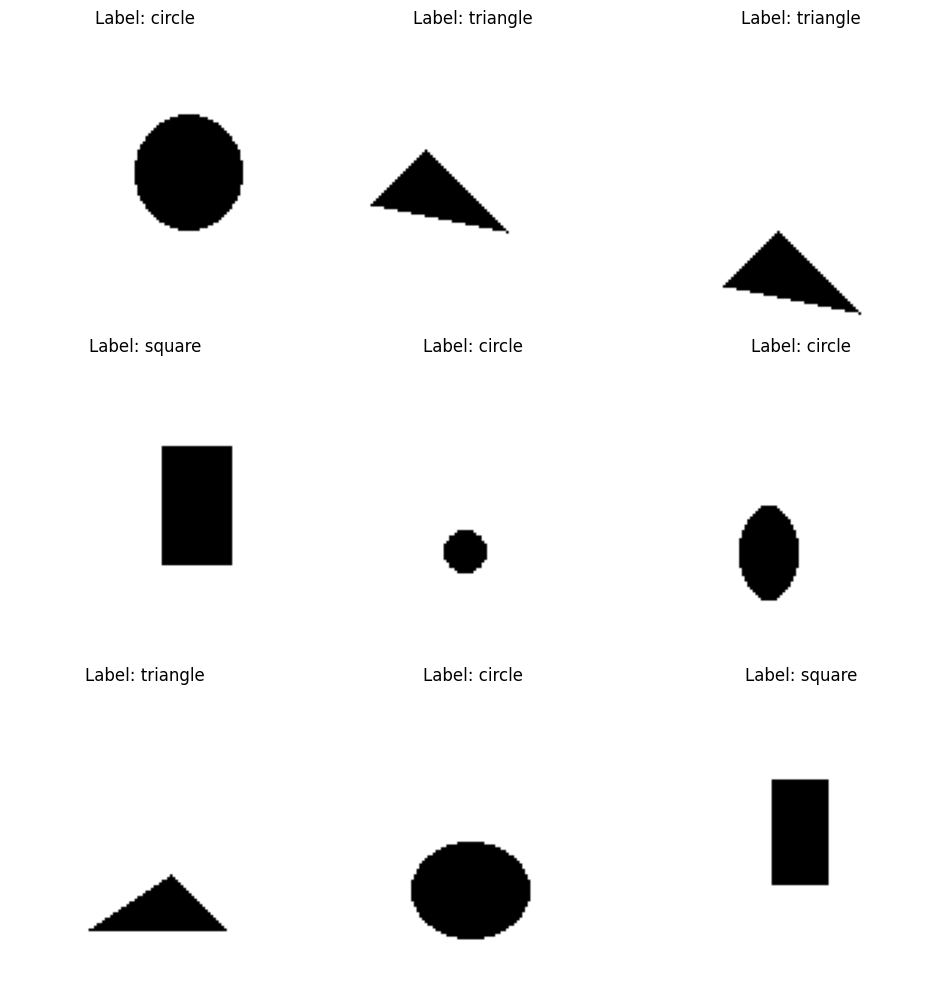

In [ ]:
# Define the number of rows and columns for image visualization
num_images_to_visualize = 9

num_rows = 3
num_columns = num_images_to_visualize // num_rows

# Get a random subset of images from the validation set
subset_indices = np.random.choice(20, num_images_to_visualize, replace=False)

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(10, 10))

# Loop through the subset of images
for i, index in enumerate(subset_indices):
    row = i // num_columns
    col = i % num_columns

    imd=(images[index]*255).astype(np.uint8)

    # Plot the image
    axes[row, col].imshow(imd)
    axes[row, col].axis('off')

    # Set the title with both true and predicted labels
    title = f"Label: {labels[index]}\n"
    axes[row, col].set_title(title)

# Adjust spacing and display the plot
plt.tight_layout()
plt.show()


###1.1.2 Images in class folders

This is probably a slightly more common way to find your image datasets, where your data set has mutliple subdirectories that split the images up into their classes. This does have a benefit of not needing to create and join to a metadata file to identify what class each image belongs in, which does streamline the process of loading and visualising using keras.

First, upload the `shapes_dataset_folders.zip` file I have uploaded to moodle to your local colab file system and unzip again using the function below.

In [ ]:
!unzip shapes_dataset_folders.zip

Archive:  shapes_dataset_folders.zip
   creating: shapes_dataset_folders/
   creating: shapes_dataset_folders/circle/
  inflating: shapes_dataset_folders/circle/image10.png  
  inflating: shapes_dataset_folders/circle/image102.png  
  inflating: shapes_dataset_folders/circle/image104.png  
  inflating: shapes_dataset_folders/circle/image106.png  
  inflating: shapes_dataset_folders/circle/image107.png  
  inflating: shapes_dataset_folders/circle/image108.png  
  inflating: shapes_dataset_folders/circle/image109.png  
  inflating: shapes_dataset_folders/circle/image11.png  
  inflating: shapes_dataset_folders/circle/image112.png  
  inflating: shapes_dataset_folders/circle/image115.png  
  inflating: shapes_dataset_folders/circle/image121.png  
  inflating: shapes_dataset_folders/circle/image126.png  
  inflating: shapes_dataset_folders/circle/image129.png  
  inflating: shapes_dataset_folders/circle/image130.png  
  inflating: shapes_dataset_folders/circle/image132.png  
  inflating: s

We can then use the `tf.keras.preprocessing.image_dataset_from_directory` function to create an image dataset. This function comes with a lot of options that lets you resize your image (all images need to be the same size for CNN to work), split your data and even batch your data for your Neural Network.

This is a very flexible function that can deal with more options than I have used below, see the [TensorFlow documentation](https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory) for more details.

In [ ]:
image_size = (128, 128) # define size we want images resized to
batch_size = 32         # define batch size to be used with Neural Network

shapes_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "shapes_dataset_folders", # Directory your images are stored in
    seed=1337,                # Random seed for sampling when splitting
    image_size=image_size,
    batch_size=batch_size,
)

# There are mutiple ways of dealing with data loaded this way
# But an intuitive one is to use a Tensorflow Dataset splitting function thile this
train_ds, nonTrain_ds = tf.keras.utils.split_dataset(shapes_ds, right_size=0.2, shuffle=True, seed=1337)
test_ds, valid_ds = tf.keras.utils.split_dataset(nonTrain_ds, right_size=0.5, shuffle=True, seed=1337)

Found 480 files belonging to 3 classes.


In this form the data is a little easier to loop through and visualise!

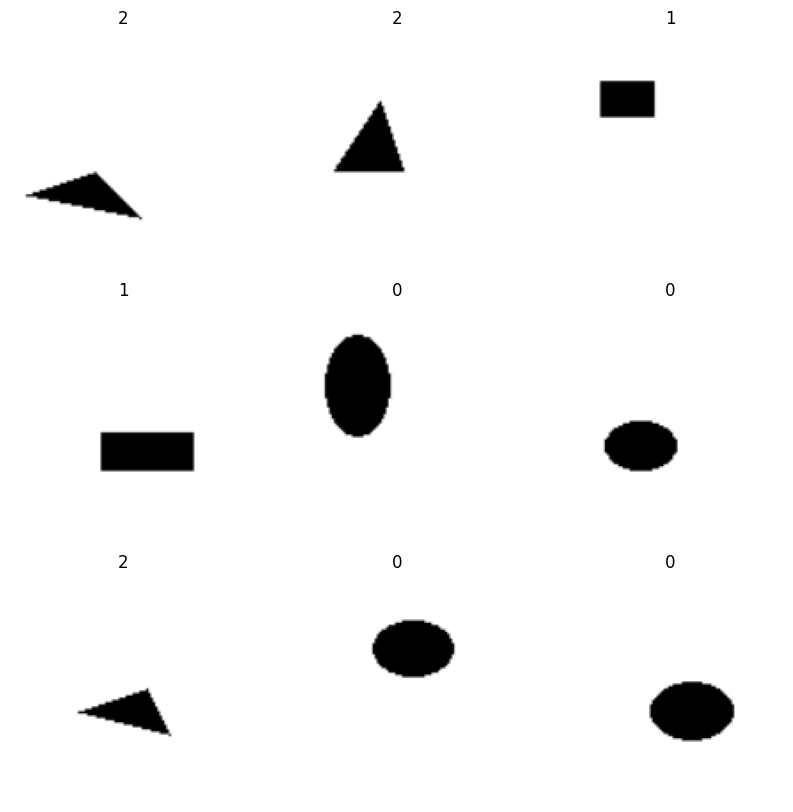

In [ ]:
# show 9 images and their labels
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(shapes_ds.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image[0] / 255)
    plt.title(int(label[0]))
    plt.axis("off")

##1.2 Hosted Datasets (Keras / sklearn)

Many image datasets can be accessed and loaded in directly through python as they have been hosted as part of various packages. This is analogous to how we have been accessing our tabular datasets in `sklearn`, and `sklearn` does also have a number of image datasets hosted. However, in this tutorial I am going to be using datasets hosted in `keras`. This can be a good way to access some interesting and famous datasets to practice with and test your models, but as said, often in reality you will be dealing with datasets stored locally (at least initially).

For this example I am going to be loading in the 'cats_vs_dogs' dataset, which is a subset of the larger CIFAR10 image Dataset loaded into tensorflow which guves us a binary classification problem of distinguishing cat and dogs.

Calling the `load_data` function on this object returns splitted train and test data in form of (features, target).

In [ ]:
train_images, validation_images, test_images = tfds.load(
    "cats_vs_dogs",
    # Use 40% for training, 10% for validation and 10% for test
    split=["train[:40%]", "train[40%:50%]", "train[50%:60%]"],
    as_supervised=True,  # Include labels
)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.1.incompleteKVYXTZ/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


The cats vs dogs dataset contains around 25,000 color images of different sizes in 2 classes (it's either an image of a dog or a cat). 1738 or those images are corrupted and therefore dropped. Since they are color images, each image has a shape given by a 3-element tuple: (height, width, 3). The last element of the tuple is always 3 because we have three color channels: red, green and blue.

It is only one of the many datasets directly available from [Tensorflow](https://www.tensorflow.org/datasets/catalog/cats_vs_dogs), do explore others!

Let's have a quick look at our dataset:


In [ ]:
print("Number of training samples: %d" % tf.data.experimental.cardinality(train_images))
print("Number of validation samples: %d" % tf.data.experimental.cardinality(validation_images))
print("Number of test samples: %d" % tf.data.experimental.cardinality(test_images))

# Get two elements of the dataset to check sizes of individual images and labels
sample_data = list(train_images.take(2))
# The .take(n) method returns a sub-dataset with n elements (https://www.tensorflow.org/api_docs/python/tf/data/Dataset#take)
# We convert it to a list for ease of use.

# Let's check the first example
print(f'Shape of the first image in the training data: {sample_data[0][0].shape}')
print(f'The first label in the training data is: {sample_data[0][1]}')

# Let's check the second example
print(f'Shape of the second image in the training data: {sample_data[1][0].shape}')
print(f'The second label in the training data is: {sample_data[1][1]}')


Number of training samples: 9305
Number of validation samples: 2326
Number of test samples: 2326
Shape of the first image in the training data: (262, 350, 3)
The first label in the training data is: 1
Shape of the second image in the training data: (409, 336, 3)
The second label in the training data is: 1


The images are of different sizes, we'll need to take care of that when/before we build the network.

For now, let's visualize some examples.

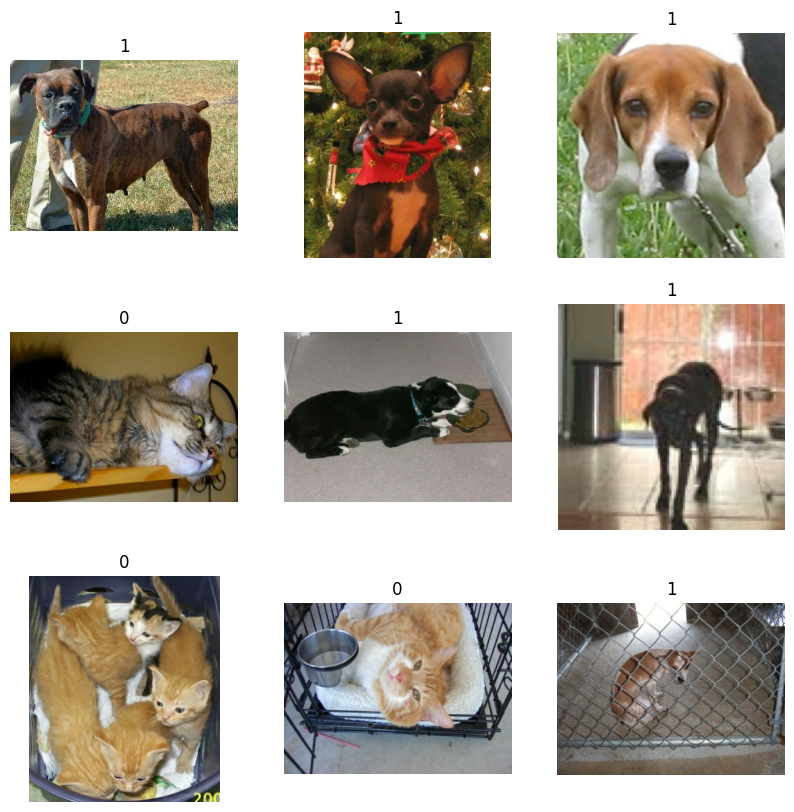

In [ ]:
# show 9 images and their labels
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_images.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image / 255)
    plt.title(int(label))
    plt.axis("off")


Now it's even more obvious that images have different sizes.

Furthermore, we can see that label 1 = dog and label 0 = cat.

So, classifying this images where the positive label (1) indicates a dog corresponds to answering the question: "is there a dog in this image?". We want to create a neural network that returns the probability that an image contains a dog - i.e. a binary classification network with a sigmoid output.

#2. Convolutional Neural Networks for Computer Vision

In this section I'll show you the different elements of a CNN and how they can be combined to solve an image clasification problem.

##2.1 CNN Architecture

Here will be a summary of all the layers you are likely to want to use in a CNN. I am going to continue using the functional API of creating NNs, but you can access the same layers using the sequential api if you wish.

### Dense Layer
`tf.keras.layers.Dense()` Normal dense layer ( = hidden = fully connected layer): each node/neuron in this layer is connected to each node in the input layer. These were the only type of Neural Network Layer we were using last week. <br>
>The two arguments passes below in dense layer are *units* and *activation* (activation function).<br>
* **units** corresponds to the number of nodes in the layer<br>
* **activation** is an element-wise activation function.
    * **'relu'**: This activation function converts every negative value to 0 and positive remains the same
    * **'softmax'**: This function takes as input a vector of K real numbers, and normalizes it into a probability distribution consisting of K probabilities proportional to the exponentials of the input numbers. The elements of the output vector are in range (0, 1) and sum to 1.
    * **'sigmoid'**: Applies the sigmoid activation function. For small values (<-5), sigmoid returns a value close to zero, and for large values (>5) the result of the function gets close to 1.
    * **'tanh'**: Applies the hyperbolic tangient function. The range of the tanh function is from (-1 to 1).
    * **None**: It means there is no activation function. In other words this layer produces linear output.

    
### Flatten Layer
`tf.keras.layers.Flatten()` flattens the input. This is required to get our multidimensional image filters into a flat '1D' form that our dense layers can use.<br>
For input of `(batch_size, height, width, depth)` the output converts to `(batch_size, height * width * depth)`


### Convolutional Layer
`tf.keras.layers.Conv2D()` Convolution layer takes the following argument
> * **filters** Number of different types of convolutions used. Initially they are set to some predefined convolution and slowly trained to find better features in the image.
* **kernel_size** An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window. Can be a single integer to specify the same value for all spatial dimensions.
* **strides** An integer or tuple/list of 2 integers, specifying the strides of the convolution along the height and width. Can be a single integer to specify the same value for all spatial dimensions. Default value is (1,1)
* **padding** one of "valid" or "same" (case-insensitive):
  * **'VALID'**: it means no padding and it assumes that all the dimensions are valid so that the input image gets fully covered by a filter and the stride specified by you.
  * **'SAME'**: it applies padding to the input image so that the input image gets fully covered by the filter and specified stride. It is called SAME because, for stride 1 , the output will be the same as the input.
* **activation** activation function  (typical options were explained before for 'dense' layer). Default value is: None
* **use_bias** Boolean, whether the layer uses a bias vector. Default value is: True
* **input_shape** Size of each input to the convolution.
* Note: There are also `1D` and `3D` versions of the convolutional layer, which may be required depending on your data type.

### Pooling
`tf.keras.layers.MaxPooling2D()` Max Pooling layer to reduce the size of the input. This layer takes the following arguments:
> * **pool_size** Dimension of pooling kernel. Default value is (2, 2)
* **strides** Integer, tuple of 2 integers, or None. Strides values. Specifies how far the pooling window moves for each pooling step. Default value is: None
* **padding** One of "valid" or "same" (case-insensitive). "valid" adds no zero padding. "same" adds padding such that if the stride is 1, the output shape is the same as input shape. Default value is "valid".<br>
`tf.keras.layers.AveragePooling2D()` Average Pooling layer to reduce the size of the input.
* Note: There are also `1D` and `3D` versions of the pooling layer, which may be required depending on your data type.

### Regularisation:
#### Kernal Regularizer
We can apply L1/L2 regualrisation to our dense layers.
Define a kernal regularizer:<br>
`kernel_regularizer = L1(l1=alpha) #Lasso`<br>
`kernel_regularizer = L2(l2=alpha) #Ridge`<br>
which we can then add to the end of our dense layers:<br>
`Dense(..., kernel_regularizer=kernel_regularizer)`


#### Dropout
`tf.keras.layers.Dropout()` Applies Dropout to the input.
The Dropout layer randomly sets input units to 0 with a frequency of 'rate' at each step during training time, which helps prevent overfitting.
It takes the following argument:
> * **rate**: Float between 0 and 1. Fraction of the input units to drop.




## Compiling the model
`model.compile()` Sets up the optimiser, loss and metrics configuration.
> * **optimizer**: updates the parameter of the Neural Network.
* **loss**: Measures the error in our model.
* **metrics**: Used to judge the model. The difference between metrics and loss is that metrics are **not** used to evaluate the model and update the weights while training, whereas loss evaluates the model error while training and helps optimizer reduce the error. As such the metrics are entirely for your benefit as a data scientist to aid your understanding of the models performance.

##2.2 Example CNN: Cats vs Dogs

In this section I will give an example of how we can use these elements to put together a CNN to solve the Cats vs Dogs proble loaded above (make sure you have run the code in `section 1.2` to load teh data into the notebook).

First of all we need to resize our images to all be the same size otherwise our network cannot function:

In [ ]:
desired_image_size = (128, 128)

# these labmda functions simply update the images with a resized version using a tensorflow resize function.
train_images = train_images.map(lambda x, y: (tf.image.resize(x, desired_image_size), y))
validation_images = validation_images.map(lambda x, y: (tf.image.resize(x, desired_image_size), y))
test_images = test_images.map(lambda x, y: (tf.image.resize(x, desired_image_size), y))

If we look at our images we can see they all have been deformed to be the same size.

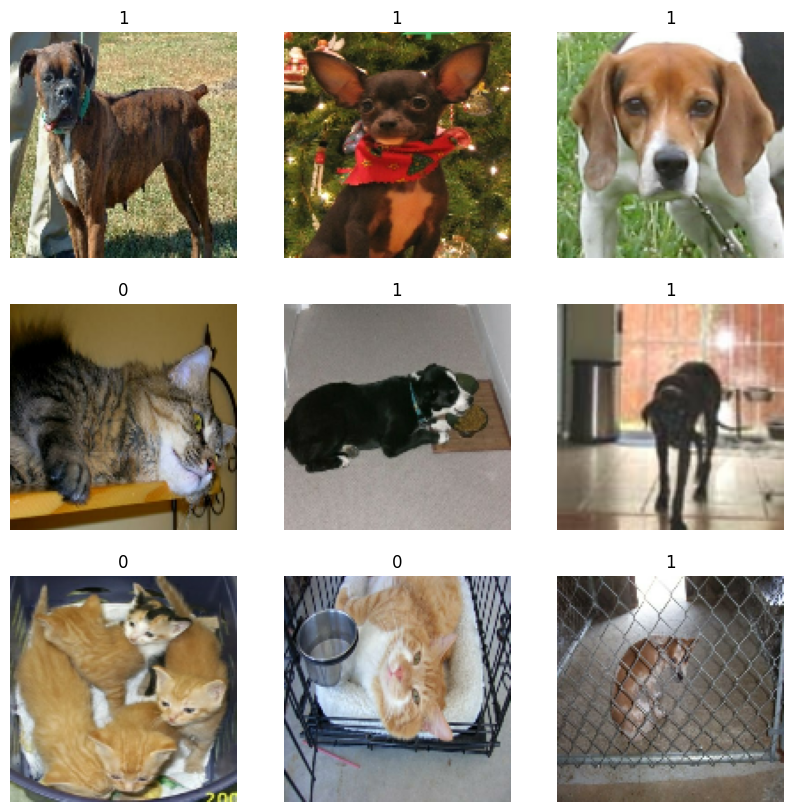

In [ ]:
# show 9 images and their labels
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_images.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image / 255)
    plt.title(int(label))
    plt.axis("off")


Now let's put together a basic CNN. Here I've got two convolutional stacks with maxpooling, which are flattened and go straight into the output.

In [ ]:
inputs = tf.keras.Input(shape=desired_image_size + (3,))

# rescaling layer : this is replacing performing feature scaling on our data at the preprocessing stage
# We could have done this using a minmax scaler, but as we know pixel values always range 0-255 this has exactly the same effect
x = layers.Rescaling(1.0 / 255, offset=0)(inputs)
x = layers.Conv2D(64, (3, 3), padding = 'SAME', activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
# final convolution block (we add a Flatten Layer as well)
x = layers.Conv2D(64, (3, 3), padding = 'SAME', activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
# flatten the output first
x = layers.Flatten()(x)

outputs = layers.Dense(1, activation="sigmoid")(x)

model = Model(inputs, outputs)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=['accuracy'])

It's often useful to have a look at the model summary to make sure the model architecture is how we expected and to get an idea of how many paramters we have to train.

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                        

```model.fit``` trains the model.
> * **train_images**: Training data/features
* **train_labels**: Target (if in a seperate variable)
* **validation_data**: The validation dataset to use for monitoring the true performance of the model.
* **epochs**: Number of times the entire dataset is fed in the model. In other words, one forward pass and one backward pass of all the training examples.
* **batch size**: Number of images that will be fed to the network at each iteration for optimizing. In other words, the number of training examples in one forward/backward pass. The higher the batch size, the more memory space you'll need.

Note on the batch size. Do not specify the batch_size if your data is in the form of datasets, generators, or keras.utils.Sequence instances. Instead, we need to make sure that our dataset object generates batches. We take care of this in the first cell below. However, if loading the whole dataset into memory (as in section `1.1.1`) then you will skip this step and you **do** need to define the batch size here.



In [ ]:
# Keras datasets need to be pre-batched before training starts.
batch_size = 128

train_images = train_images.batch(batch_size)
validation_images = validation_images.batch(batch_size)
test_images = test_images.batch(batch_size)


Let's start training our model and make a plot of our learning curve:

Epoch 1/10
73/73 [==============================] - 26s 269ms/step - loss: 0.7014 - accuracy: 0.5632 - val_loss: 0.6472 - val_accuracy: 0.6268
Epoch 2/10
73/73 [==============================] - 15s 208ms/step - loss: 0.6176 - accuracy: 0.6613 - val_loss: 0.5840 - val_accuracy: 0.6926
Epoch 3/10
73/73 [==============================] - 15s 204ms/step - loss: 0.5848 - accuracy: 0.6963 - val_loss: 0.5663 - val_accuracy: 0.7077
Epoch 4/10
73/73 [==============================] - 15s 202ms/step - loss: 0.5485 - accuracy: 0.7257 - val_loss: 0.5380 - val_accuracy: 0.7352
Epoch 5/10
73/73 [==============================] - 18s 241ms/step - loss: 0.4972 - accuracy: 0.7577 - val_loss: 0.5255 - val_accuracy: 0.7425
Epoch 6/10
73/73 [==============================] - 15s 203ms/step - loss: 0.4517 - accuracy: 0.7893 - val_loss: 0.5347 - val_accuracy: 0.7442
Epoch 7/10
73/73 [==============================] - 15s 204ms/step - loss: 0.4152 - accuracy: 0.8103 - val_loss: 0.5407 - val_accuracy: 0.7515

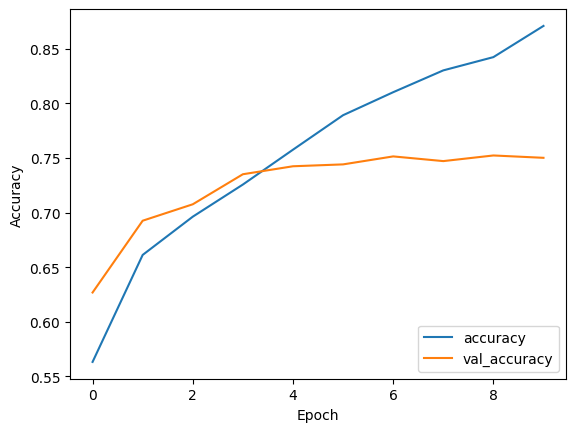

In [ ]:
# Training
history = model.fit(train_images, epochs=10,
                    validation_data=validation_images)

# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')


I would say we have some evidence of overfitting, but we are getting better accuracy than a random guess. Let's evaluate our model on the test data:

In [ ]:
# evaluate model on test dataset
model.evaluate(test_images)

19/19 [==============================] - 4s 182ms/step - loss: 0.5983 - accuracy: 0.7506


[0.5982787013053894, 0.750644862651825]

We seem to be getting similar performance on the test data. It looks like our model could definitely be improved, but we are getting about 75% accuracy.

Don't forget that we also have confusion matrices and our other classifications metrics (precision, recall, f1) to be considered when evaluating our model.

19/19 [==============================] - 3s 135ms/step
The accuracy on the test data: 0.7506448839208942
The F1 score on the test data: 0.7593360995850622
Precision on test data: 0.725614591593973
Recall on test data: 0.7963446475195822


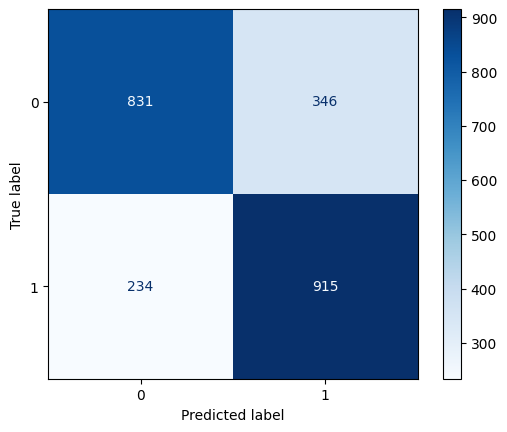

In [ ]:

pred_labels = model.predict(test_images)
pred_labels = (pred_labels > 0.5).astype(int)

test_labels = []
for images, labels in test_images:
    test_labels.extend(labels.numpy())

# Convert the list to a NumPy array for further use
test_labels = np.array(test_labels)

disp = ConfusionMatrixDisplay(confusion_matrix(test_labels, pred_labels))
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)

acc_test = accuracy_score(test_labels, pred_labels)
f1_test = f1_score(test_labels, pred_labels, pos_label=1)
print('The accuracy on the test data:', acc_test)
print('The F1 score on the test data:', f1_test)
pre_test = precision_score(test_labels, pred_labels, pos_label=1)
print('Precision on test data:', pre_test)
reca_test = recall_score(test_labels, pred_labels, pos_label=1)
print('Recall on test data:', reca_test)

Now let's visualize the prediction using the model you just trained.
First, we get the predictions with the model from the test data.
Then we print out 15 images from the test data set and set the titles with the prediction (and the ground truth label).
If the prediction matches the true label, the title will be green; otherwise, it's displayed in red.

A visualisation like this can be a good way to demonstrate the models performance and may also help highlight what kind of images the CNN is struggling to understand. However, do bear in mind this is just a small sample - so you may get un/lucky in the sample visualised especially if there is a class imbalance, and as such you do need to use your classification metrics to get a true appraisal of the model’s performance.

19/19 [==============================] - 3s 135ms/step


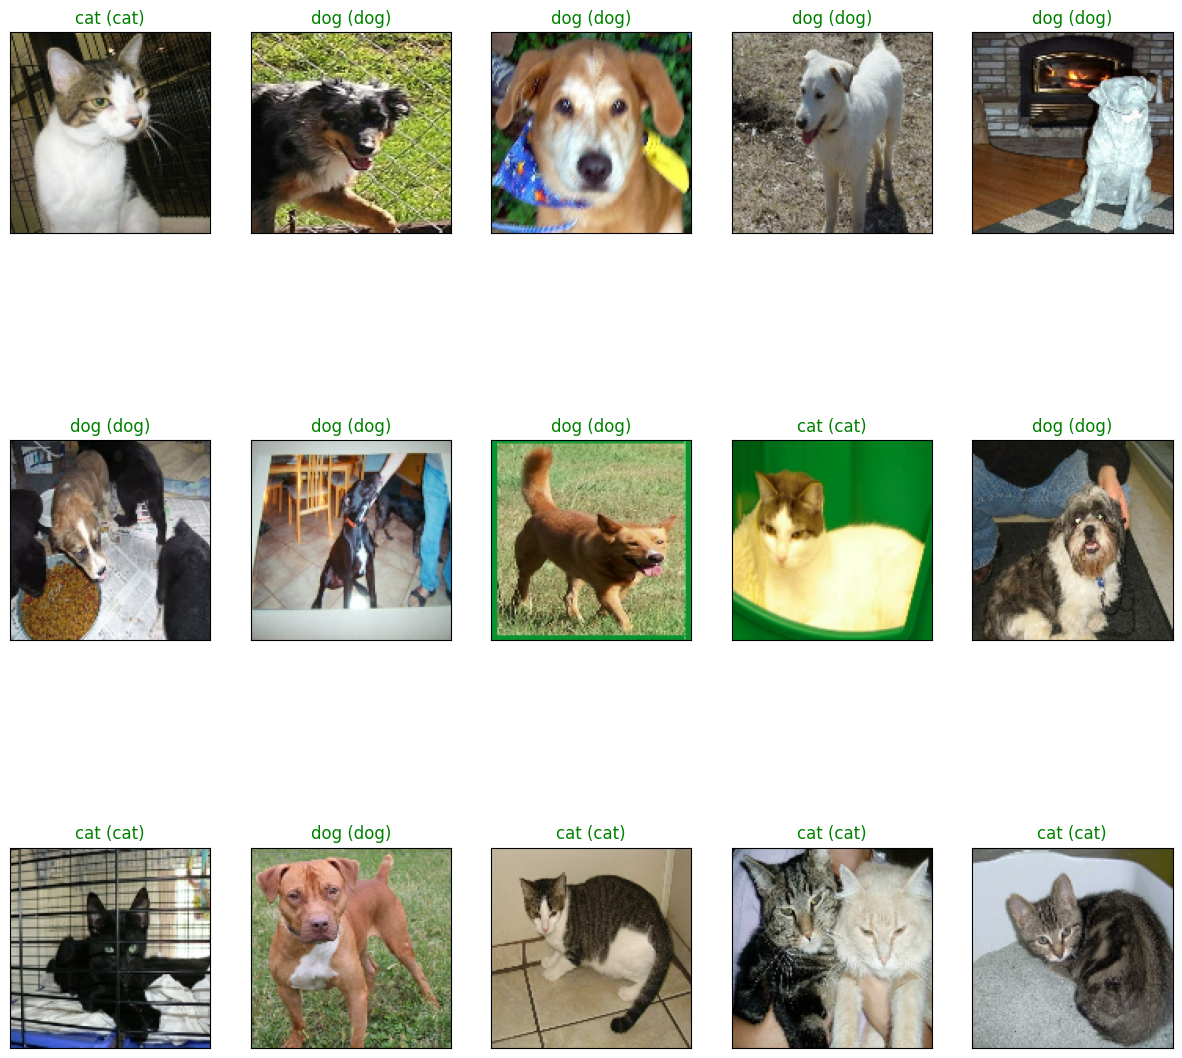

In [ ]:
# Predict the labels for our test images
predictions = model.predict(test_images)
# Convert the probability of being a dog to our class labels (p>0.5 = Dog, p<0.5 = Cat)
predictions_index = (predictions>.5).astype(int)
y_hat = predictions_index.ravel() # flattens the amatrix to an array
class_names = ['cat', 'dog']

# let's take 15 samples from the test dataset
sample_test_images, sample_test_labels = list(test_images.take(1))[0] #now this is a batch with 128 examples

# Plot a random sample of 15 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(15, 15))
for i, (image, label) in enumerate(zip(sample_test_images[:15], sample_test_labels[:15])):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(image / 255.) #imshow needs inputs between 0 and 1
    predict_index = y_hat[i]
    true_index = label
    # Set the title for each image
    ax.set_title("{} ({})".format(class_names[predict_index],
                                  class_names[true_index]),
                                  color=("green" if predict_index == true_index else "red"))


##2.3 Feature Maps

Looking at the feature maps (outputs of our convolutional blocks) allows us to see what the CNN is identifying as important features in the dataset.

While this of often of limit practical use for improving our model, as the feature maps can be quite abstract to a human a lot of the time, the can nevertheless be useful for helping understand what kind of features our convultional stacks are identifying a well as just aiding our understanding of how our CNNs function.

Try looking at differnt images in the code below as well as looking at the feature maps generated at differnt layers of the network.

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
Total params: 38720 (151.25 KB)
Trainable params: 38720 (151.25 KB)
Non-trainable params: 0 (0.00 Byte)
_____________________

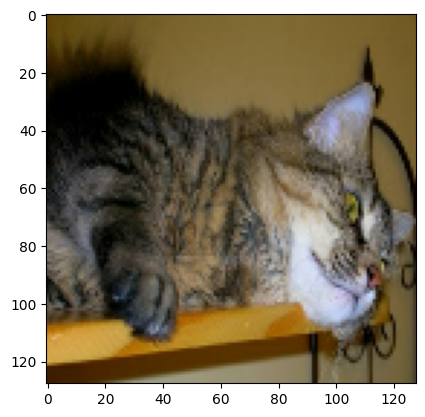

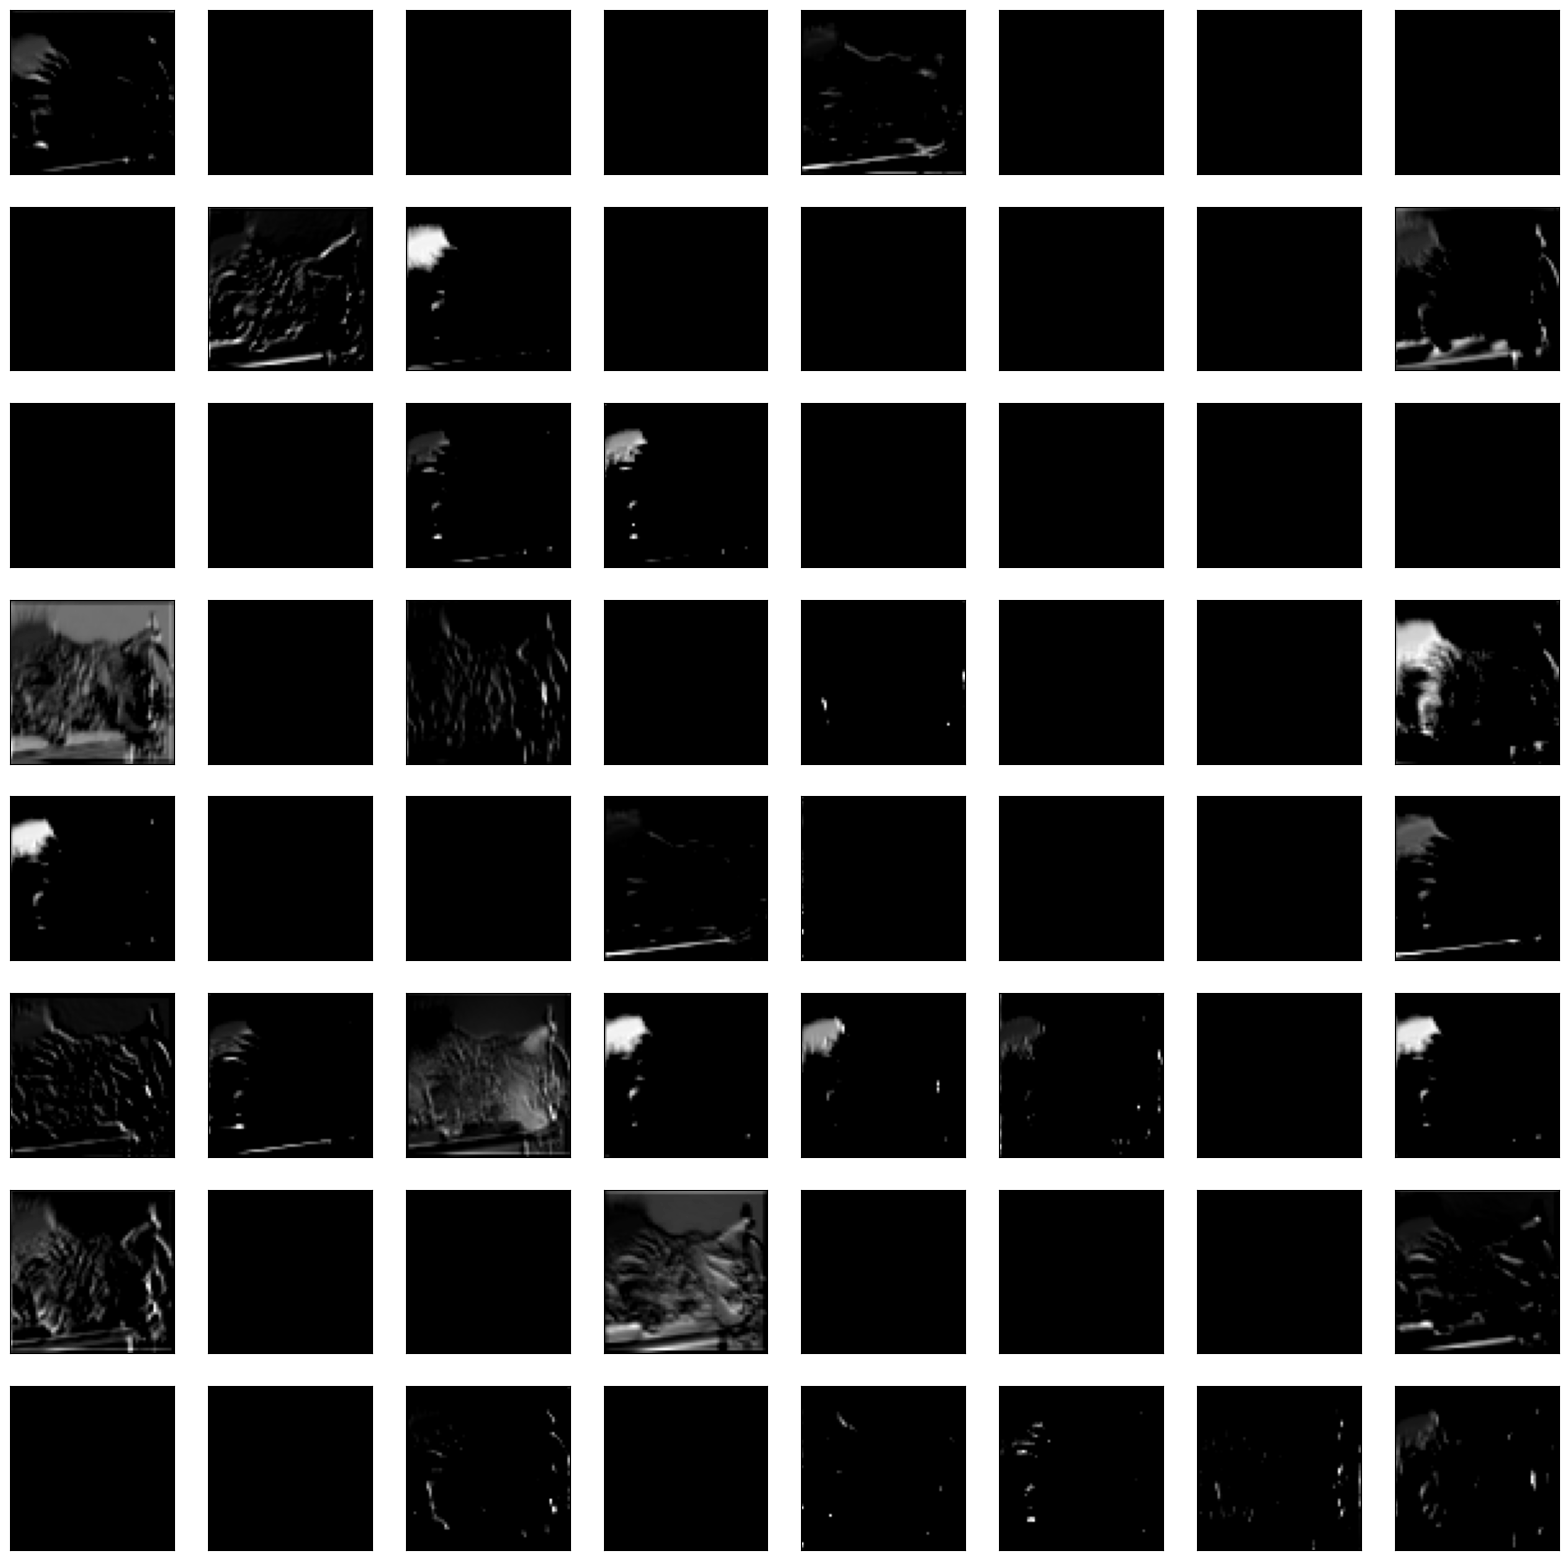

In [ ]:
# redefine a new model to output right after the first convolutional stack
# you can change here the selected layer
model1 = Model(inputs=model.inputs, outputs=model.layers[4].output)
model1.summary()
# taking a sample of 10 training images
img = train_images.take(10)
# get feature map for first hidden layer by predicting using our new model
feature_maps = model1.predict(img)

# Pick and image to visualise the feature map for
imno= 3

# get feature_maps for first image
feature_maps = feature_maps[imno]
# get first image - [0][0][0] means take the first batch, then take the first element (the images), then take the first image
first_img = list(img)[0][0][imno]

# plot all 64 maps in an 8x8 squares
# if you change the number of layers in the model you may need to change here the squares: their product should be equal to the number of feature maps in the layer that you have selected
square1 = 8
square2 = 8
ix = 1 # Feture map index (to be iterated)

plt.imshow(first_img / 255.)

# create our empty figure and fill with our feature maps
figure = plt.figure(figsize=(20, 20))
for _ in range(square1):
	for _ in range(square2):
		# specify subplot and turn of axis
		ax = figure.add_subplot(square1, square2, ix, xticks=[], yticks=[])
    # Display each image
		# plot filter channel in grayscale
		ax.imshow(feature_maps[:, :, ix-1], cmap='gray')
		ix += 1
# show the figure
plt.show()

##2.4 Defining networks using functions

As has been said throughout this module, doing things by had isn't a problem in of itself, but automating things can often speed things up and ensure your resulting work is more consistent.

For this reason, while I showed you how to contruct a CNN layer by layer above, here I have also got a function that will create a network for you based on various inputs. This isn't the perfect solution to everything - there are still various hard coded hyperparameters that you should experiment with, but working off this should give you a nice generic framework for your CNNs that you can easily expand to many different problems.

In [ ]:
def build_model(input_shape, num_classes, n_conv_blocks=3, n_dense_blocks = 2, DROPOUT=True):
    inputs = tf.keras.Input(shape=input_shape)

    # rescaling layer
    x = layers.Rescaling(1.0 / 255, offset=0)(inputs)

    # convolution blocks
    for _ in range(n_conv_blocks-1):
        x = layers.Conv2D(64, (3, 3), padding = 'SAME', activation='linear')(x)
        #Separating the activation part from the convolution part adds flexibility.
        #x = layers.Activation("relu")(x)   #If stacking many convolutional layers it isn't unusual not to have any activation until the final dense layers, so you may want to comment this line
        x = layers.MaxPooling2D((2, 2))(x)
        if DROPOUT:
            x = layers.Dropout(0.3)(x)

    # final convolution block (we add a Flatten Layer as well)
    x = layers.Conv2D(64, (3, 3), padding = 'SAME', activation='linear')(x)
    #x = layers.Activation("relu")(x) #separating the activation part from the convolution part adds flexibility
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Flatten()(x)
    if DROPOUT:
        x = layers.Dropout(0.3)(x)

    # Dense block
    for _ in range(n_dense_blocks):
        x = layers.Dense(50, activation='relu')(x)
        if DROPOUT:
            x = layers.Dropout(0.3)(x)

    # Output
    # REMEMBER THAT: sigmoid activation is for binary classification, softmax for multi-class
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    # flatten the output first
    outputs = layers.Dense(units, activation=activation)(x)
    return  Model(inputs, outputs)

Here we are actually calling this function to make our model as well as creating an if statement that will compile our model differently depending on the type of classification problem.

In [ ]:
num_classes=2
model = build_model(input_shape=desired_image_size + (3,), num_classes=num_classes)

# as metric we choose the accuracy: the total number of correct predictions made
if num_classes==2:
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss="binary_crossentropy",
              metrics=['accuracy'])
else:
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


FInally, let's look at our final model summary to make sure our function has worked as we expected!

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 64, 64, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        36928     
                                                           

## 2.5 Exercises


For these exercises I have a selection of different datasets I would like you to try experimenting with creating CNNs for.

When doing this there are a number of things you may want to experiment with that can impact the performance of you CNN such as:
- Changing the number of feature maps in each conv layer and using different strides
- Adding more layers to the network (conv, pooling, dense layers)
  - You generally want pooling layers to end your convolutional stacks, but sometimes you may have multiple convolutional layers before pooling
  - you usually only have dense layers at the end of the network after the convolutional stacks are flattened.
- Adding dropout at different parts of your network, and changing teh dropout strength
- Using 'SAME' instead of 'VALID' padding
- Using different activation functions in your hidden layers
- Using different optimizers
- Using different learning rates
- Using different batch sizes (note the differences in the performance and the training time)
- Training for more epochs

Don't forget to use the classification metrics and/or confusion matrices to properly evaluate your CNNs! Refer back to last weeks tutorial for some more examples of using these with Neural Networks.

###2.5.1 Exercise 1 - Cats vs Dogs

As said above, the Cats vs Dogs example Network didn't have fantastic performance, with clear signs of overfitting. Try using the model generating function from `2.4` to create a better CNN that gives us a better result.

In [ ]:
##############################################################
# Your code here
##############################################################



In [ ]:
def build_model(input_shape, num_classes, n_conv_blocks=3, n_dense_blocks = 2, DROPOUT=True):
    inputs = keras.Input(shape=input_shape)

    # rescaling layer
    x = layers.Rescaling(1.0 / 255, offset=0)(inputs)

    # convolution blocks
    for _ in range(n_conv_blocks-1):
        x = layers.Conv2D(64, (3, 3), padding = 'SAME', activation='linear')(x)
        x = layers.Activation("relu")(x)  #separating the activation part from the convolution part adds flexibility
        x = layers.MaxPooling2D((2, 2))(x)
        if DROPOUT:
            x = layers.Dropout(0.3)(x)

    # final convolution block (we add a Flatten Layer as well)
    x = layers.Conv2D(64, (3, 3), padding = 'SAME', activation='linear')(x)
    x = layers.Activation("relu")(x) #separating the activation part from the convolution part adds flexibility
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Flatten()(x)
    if DROPOUT:
        x = layers.Dropout(0.3)(x)

    # Dense block
    for _ in range(n_dense_blocks):
        x = layers.Dense(50, activation='relu')(x)
        if DROPOUT:
            x = layers.Dropout(0.3)(x)

    # Output
    # REMEMBER THAT: sigmoid activation is for binary classification, softmax for multi-class
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    # flatten the output first
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)



num_classes=2
model = build_model(input_shape=desired_image_size + (3,), num_classes=num_classes)

# as metric we choose the accuracy: the total number of correct predictions made
if num_classes==2:
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss="binary_crossentropy",
              metrics=['accuracy'])
else:
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


In [ ]:
train_images, validation_images, test_images = tfds.load(
    "cats_vs_dogs",
    # Use 40% for training, 10% for validation and 10% for test
    split=["train[:40%]", "train[40%:50%]", "train[50%:60%]"],
    as_supervised=True,  # Include labels
)

In [ ]:
desired_image_size = (128, 128)

# these labmda functions simply update the images with a resized version using a tensorflow resize function.
train_images = train_images.map(lambda x, y: (tf.image.resize(x, desired_image_size), y))
validation_images = validation_images.map(lambda x, y: (tf.image.resize(x, desired_image_size), y))
test_images = test_images.map(lambda x, y: (tf.image.resize(x, desired_image_size), y))


batch_size = 128

train_images = train_images.batch(batch_size)
validation_images = validation_images.batch(batch_size)
test_images = test_images.batch(batch_size)


Epoch 1/10
73/73 [==============================] - 28s 228ms/step - loss: 0.6935 - accuracy: 0.5114 - val_loss: 0.6840 - val_accuracy: 0.5559
Epoch 2/10
73/73 [==============================] - 16s 222ms/step - loss: 0.6592 - accuracy: 0.6025 - val_loss: 0.6058 - val_accuracy: 0.7034
Epoch 3/10
73/73 [==============================] - 16s 219ms/step - loss: 0.5971 - accuracy: 0.6814 - val_loss: 0.5788 - val_accuracy: 0.7309
Epoch 4/10
73/73 [==============================] - 16s 220ms/step - loss: 0.5662 - accuracy: 0.7099 - val_loss: 0.5215 - val_accuracy: 0.7502
Epoch 5/10
73/73 [==============================] - 19s 266ms/step - loss: 0.5353 - accuracy: 0.7349 - val_loss: 0.5065 - val_accuracy: 0.7747
Epoch 6/10
73/73 [==============================] - 19s 260ms/step - loss: 0.5107 - accuracy: 0.7473 - val_loss: 0.4775 - val_accuracy: 0.7803
Epoch 7/10
73/73 [==============================] - 19s 257ms/step - loss: 0.4891 - accuracy: 0.7616 - val_loss: 0.4941 - val_accuracy: 0.7627

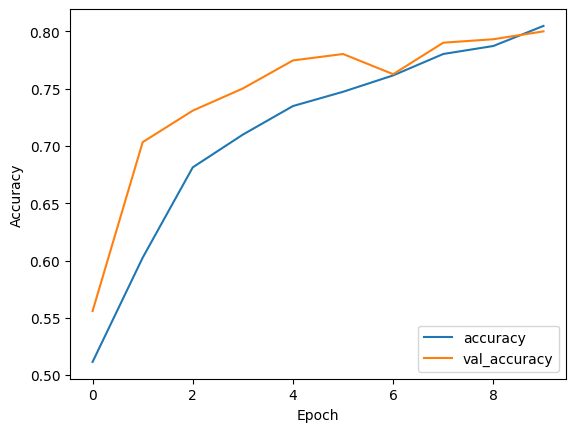

In [ ]:
# Training
history = model.fit(train_images, epochs=10,
                    validation_data=validation_images)

# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')


### 3.5.2 Exercise 2 - Shapes Dataset

For the next exercise, try taking the shapes dataset we practised loading in for section 1.1 (either from `shapes_dataset_meta.zip` or `shapes_dataset_folders.zip`, but bear in mind the `_folders` version has less images). See how accurate a CNN you can create for this problem - how does it compare to the Neural Network used in Appendix 3 last week?

In [ ]:
##############################################################
# Your code here
##############################################################

In [ ]:
!unzip shapes_dataset_meta.zip

Archive:  shapes_dataset_meta.zip
replace shapes_dataset_meta/metadata.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:

# Load metadata from the CSV file - this allows us to know what class each picture belongs to.
metadata = pd.read_csv("shapes_dataset_meta/metadata.csv")

# Define the directory where your images are located (in colab in our case)
image_directory = "shapes_dataset_meta/shapes"

# Define image size - this means we can rescale all our images to be the same size
image_size = (100, 100)

# Create lists to store image data and labels
images = []
labels = []

# Load and preprocess images
for index, row in metadata.iterrows():
    image_path = os.path.join(image_directory, row['image_name'])
    image = load_img(image_path, target_size=image_size)
    image_array = img_to_array(image) / 255.0  # Normalize pixel values to [0, 1]
    images.append(image_array)
    labels.append(row['class_label'])

In [ ]:
# Convert lists to NumPy arrays

class_mapping = {'square': 0, 'circle': 1, 'triangle': 2}
labels = [class_mapping[label] for label in labels]


images = np.array(images)
labels = np.array(labels)


# Split the data into training and validation sets
X_non_test, X_test, y_non_test, y_test = train_test_split(images, labels, test_size=1/10, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_non_test, y_non_test, test_size=1/9, random_state=42)

In [ ]:
def build_model(input_shape, num_classes, n_conv_blocks=3, n_dense_blocks = 2, DROPOUT=True):
    inputs = keras.Input(shape=input_shape)

    # rescaling layer
    x = layers.Rescaling(1.0 / 255, offset=0)(inputs)

    # convolution blocks
    for _ in range(n_conv_blocks-1):
        x = layers.Conv2D(32, (3, 3), padding = 'SAME', activation='linear')(x)
        # x = layers.Activation("relu")(x)  #separating the activation part from the convolution part adds flexibility
        x = layers.MaxPooling2D((2, 2))(x)
        if DROPOUT:
            x = layers.Dropout(0.5)(x)

    # final convolution block (we add a Flatten Layer as well)
    x = layers.Conv2D(32, (3, 3), padding = 'SAME', activation='linear')(x)
    # x = layers.Activation("relu")(x) #separating the activation part from the convolution part adds flexibility
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Flatten()(x)
    if DROPOUT:
        x = layers.Dropout(0.5)(x)

    # Dense block
    for _ in range(n_dense_blocks):
        x = layers.Dense(1000, activation='relu')(x)
        if DROPOUT:
            x = layers.Dropout(0.5)(x)

    # Output
    # REMEMBER THAT: sigmoid activation is for binary classification, softmax for multi-class
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    # flatten the output first
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)


desired_image_size = (100, 100)
num_classes=3
model = build_model(input_shape=desired_image_size + (3,), num_classes=num_classes)

# as metric we choose the accuracy: the total number of correct predictions made
if num_classes==2:
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss="binary_crossentropy",
              metrics=['accuracy'])
else:
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


In [ ]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 rescaling_3 (Rescaling)     (None, 100, 100, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 50, 50, 32)        0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 50, 50, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 50, 50, 32)        9248      
                                                           

Epoch 1/200
8/8 [==============================] - 7s 94ms/step - loss: 1.1013 - accuracy: 0.3375 - val_loss: 1.0957 - val_accuracy: 0.3800
Epoch 2/200
8/8 [==============================] - 0s 51ms/step - loss: 1.1006 - accuracy: 0.3413 - val_loss: 1.1001 - val_accuracy: 0.3000
Epoch 3/200
8/8 [==============================] - 0s 51ms/step - loss: 1.1009 - accuracy: 0.3450 - val_loss: 1.0944 - val_accuracy: 0.3800
Epoch 4/200
8/8 [==============================] - 0s 49ms/step - loss: 1.0996 - accuracy: 0.3375 - val_loss: 1.1078 - val_accuracy: 0.3000
Epoch 5/200
8/8 [==============================] - 0s 52ms/step - loss: 1.1011 - accuracy: 0.3450 - val_loss: 1.0964 - val_accuracy: 0.3500
Epoch 6/200
8/8 [==============================] - 0s 47ms/step - loss: 1.0973 - accuracy: 0.3462 - val_loss: 1.0687 - val_accuracy: 0.3800
Epoch 7/200
8/8 [==============================] - 0s 46ms/step - loss: 1.0500 - accuracy: 0.4338 - val_loss: 1.0467 - val_accuracy: 0.4700
Epoch 8/200
8/8 [===

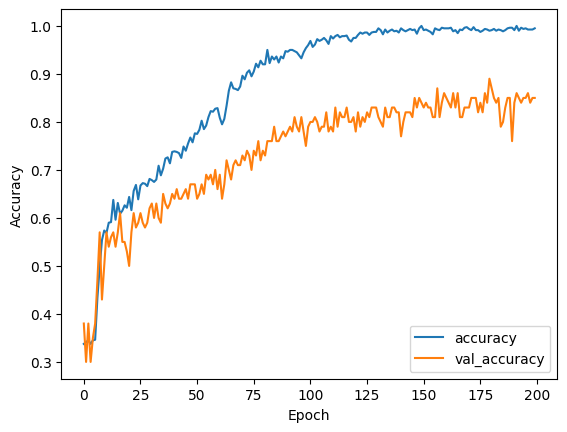

In [ ]:
# Training

history = model.fit(X_train, y_train, epochs=200, batch_size=100, validation_data=(X_valid, y_valid))

# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
validation_loss, validation_accuracy = model.evaluate(X_valid, y_valid)
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Validation loss: {validation_loss:.4f}")
print(f"Validation accuracy: {validation_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")


4/4 [==============================] - 0s 27ms/step - loss: 0.5990 - accuracy: 0.8800
Validation loss: 0.9908
Validation accuracy: 0.8500
Test loss: 0.5990
Test accuracy: 0.8800


4/4 [==============================] - 0s 9ms/step
The accuracy on the test data: 0.88
The F1 score on the test data: 0.87818967249347
Precision on test data: 0.9024547803617571
Recall on test data: 0.8703703703703703


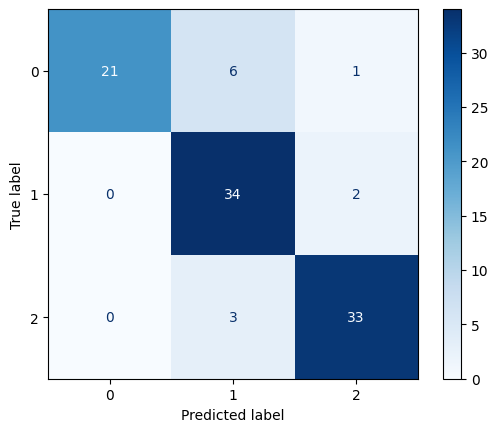

In [ ]:
pred_labels = model.predict(X_test)
pred_labels = np.argmax(pred_labels, axis=1)

disp = ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels))
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)

acc_test = accuracy_score(y_test, pred_labels)
f1_test = f1_score(y_test, pred_labels, average='macro')
print('The accuracy on the test data:', acc_test)
print('The F1 score on the test data:', f1_test)
pre_test = precision_score(y_test, pred_labels, average='macro')
print('Precision on test data:', pre_test)
reca_test = recall_score(y_test, pred_labels, average='macro')
print('Recall on test data:', reca_test)

4/4 [==============================] - 0s 7ms/step


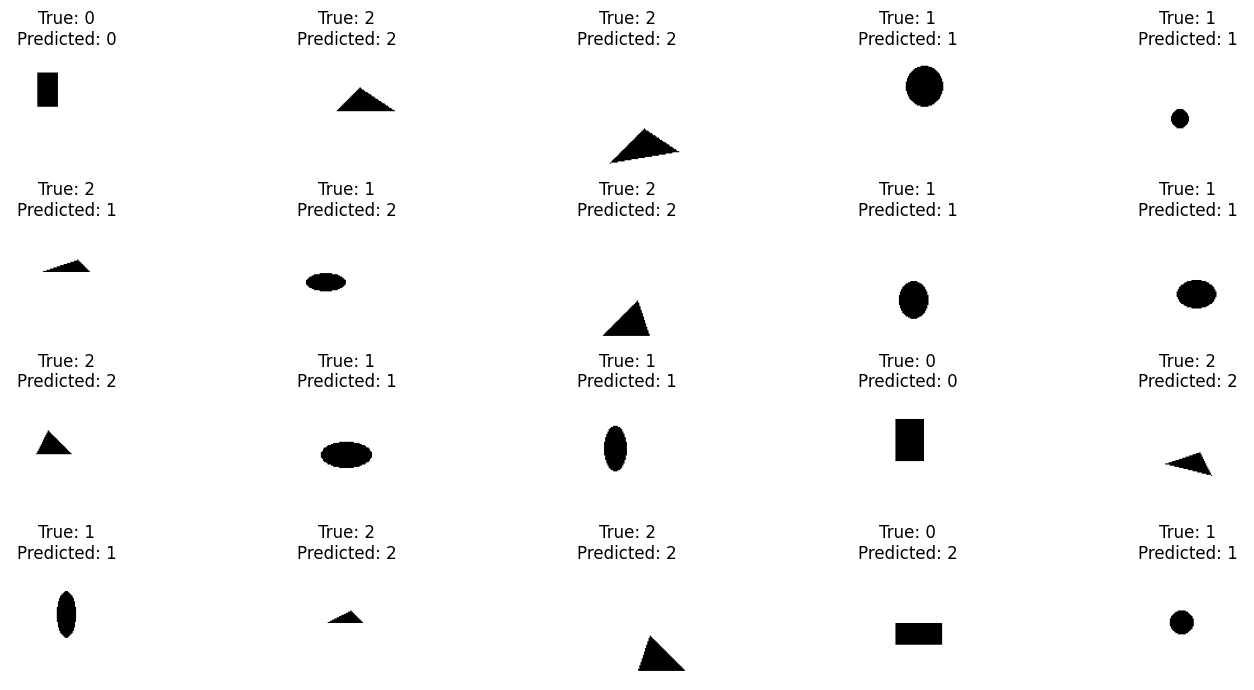

In [ ]:
# Define the number of rows and columns for image visualization
num_images_to_visualize = 20

num_rows = 4
num_columns = num_images_to_visualize // num_rows

# Get a random subset of images from the validation set
subset_indices = np.random.choice(20, num_images_to_visualize, replace=False)

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 7))

predicted_prob = model.predict(X_test)
predicted_classes = np.argmax(predicted_prob, axis=1)

predicted_classes_name = predicted_classes

# Loop through the subset of images
for i, index in enumerate(subset_indices):
    row = i // num_columns
    col = i % num_columns

    imd=(X_test[index]*255).astype(np.uint8)

    # Plot the image
    axes[row, col].imshow(imd)
    axes[row, col].axis('off')

    # Set the title with both true and predicted labels
    title = f"True: {y_test[index]}\nPredicted: {predicted_classes[index]}"
    axes[row, col].set_title(title)

# Adjust spacing and display the plot
plt.tight_layout()
plt.show()


In [ ]:
# I'll also show a quick example of how things would change if using the second method of loading with class labels.

In [ ]:
!unzip shapes_dataset_folders.zip

Archive:  shapes_dataset_folders.zip
replace shapes_dataset_folders/circle/image10.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
image_size = (100, 100) # define size we want images resized to
batch_size = 32         # define batch size to be used with Neural Network

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "shapes_dataset_folders", # Directory your images are stored in
    seed=1337,                # Random seed for sampling when splitting
    image_size=image_size,
    batch_size=batch_size,
)


Found 480 files belonging to 3 classes.


In [ ]:
train_ds, nonTrain_ds = tf.keras.utils.split_dataset(dataset, right_size=0.2, shuffle=True, seed=1337)
test_ds, valid_ds = tf.keras.utils.split_dataset(nonTrain_ds, right_size=0.5, shuffle=True, seed=1337)

In [ ]:
def build_model(input_shape, num_classes, n_conv_blocks=3, n_dense_blocks = 2, DROPOUT=True):
    inputs = keras.Input(shape=input_shape)

    # rescaling layer
    x = layers.Rescaling(1.0 / 255, offset=0)(inputs)

    # convolution blocks
    for _ in range(n_conv_blocks-1):
        x = layers.Conv2D(32, (3, 3), padding = 'SAME', activation='linear')(x)
        # x = layers.Activation("relu")(x)  #separating the activation part from the convolution part adds flexibility
        x = layers.MaxPooling2D((2, 2))(x)
        if DROPOUT:
            x = layers.Dropout(0.5)(x)

    # final convolution block (we add a Flatten Layer as well)
    x = layers.Conv2D(32, (3, 3), padding = 'SAME', activation='linear')(x)
    # x = layers.Activation("relu")(x) #separating the activation part from the convolution part adds flexibility
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Flatten()(x)
    if DROPOUT:
        x = layers.Dropout(0.5)(x)

    # Dense block
    for _ in range(n_dense_blocks):
        x = layers.Dense(1000, activation='relu')(x)
        if DROPOUT:
            x = layers.Dropout(0.5)(x)

    # Output
    # REMEMBER THAT: sigmoid activation is for binary classification, softmax for multi-class
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    # flatten the output first
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)


desired_image_size = (100, 100)
num_classes=3
model = build_model(input_shape=desired_image_size + (3,), num_classes=num_classes)

# as metric we choose the accuracy: the total number of correct predictions made
if num_classes==2:
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss="binary_crossentropy",
              metrics=['accuracy'])
else:
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


Epoch 1/100
12/12 [==============================] - 6s 64ms/step - loss: 3.8998 - accuracy: 0.3672 - val_loss: 1.6386 - val_accuracy: 0.3281
Epoch 2/100
12/12 [==============================] - 0s 26ms/step - loss: 1.3852 - accuracy: 0.3750 - val_loss: 1.1098 - val_accuracy: 0.3281
Epoch 3/100
12/12 [==============================] - 0s 20ms/step - loss: 1.2008 - accuracy: 0.3281 - val_loss: 1.1747 - val_accuracy: 0.3125
Epoch 4/100
12/12 [==============================] - 0s 20ms/step - loss: 1.1806 - accuracy: 0.3073 - val_loss: 1.0879 - val_accuracy: 0.3125
Epoch 5/100
12/12 [==============================] - 0s 15ms/step - loss: 1.1023 - accuracy: 0.3828 - val_loss: 1.0361 - val_accuracy: 0.4375
Epoch 6/100
12/12 [==============================] - 0s 16ms/step - loss: 1.0952 - accuracy: 0.3932 - val_loss: 1.0234 - val_accuracy: 0.5469
Epoch 7/100
12/12 [==============================] - 0s 15ms/step - loss: 1.1041 - accuracy: 0.3672 - val_loss: 1.0017 - val_accuracy: 0.4688
Epoch 

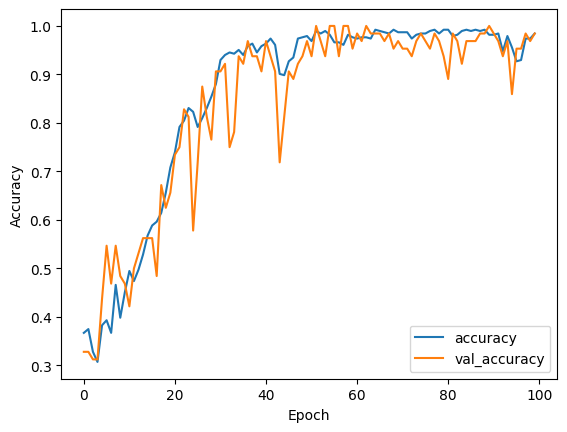

In [ ]:
# Training

history = model.fit(train_ds, epochs=100, batch_size=100, validation_data=valid_ds)

# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

1/1 [==============================] - 0s 158ms/step
The accuracy on the test data: 0.96875
The F1 score on the test data: 0.9691228070175439
Precision on test data: 0.9666666666666667
Recall on test data: 0.9743589743589745


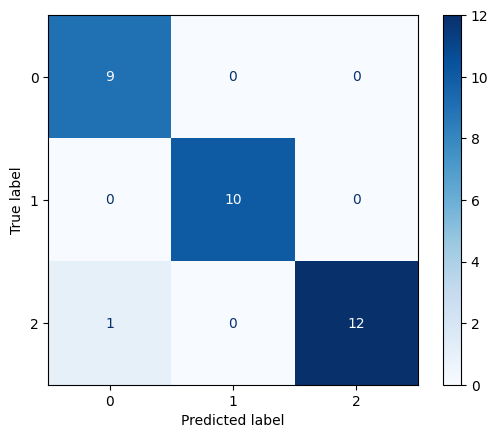

In [ ]:
pred_labels = model.predict(test_ds)
pred_labels = np.argmax(pred_labels, axis=1)

test_labels = []
for images, labels in test_ds:
    test_labels.extend(labels.numpy())

# Convert the list to a NumPy array for further use
test_labels = np.array(test_labels)

disp = ConfusionMatrixDisplay(confusion_matrix(test_labels, pred_labels))
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)

acc_test = accuracy_score(test_labels, pred_labels)
f1_test = f1_score(test_labels, pred_labels, average='macro')
print('The accuracy on the test data:', acc_test)
print('The F1 score on the test data:', f1_test)
pre_test = precision_score(test_labels, pred_labels, average='macro')
print('Precision on test data:', pre_test)
reca_test = recall_score(test_labels, pred_labels, average='macro')
print('Recall on test data:', reca_test)

### 3.5.3 Exercise 3 - MNIST Dataset

For this task, try using what you've learnt to the MNIST dataset hosted on tensorflow. This is a dataset of hand written numbers 0-9. I'll start you off by loading in the data - see if you can make a CNN that provides a good solution for classifying this data.

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
import tensorflow.keras.datasets.mnist as input_data

mnist = input_data.load_data("MNIST-data")
(x_train, y_train), (x_test, y_test) = mnist

In [ ]:
#(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

(train_images, train_labels), (test_images, test_labels) = tfds.load_data("mnist")

#train_images = np.reshape(train_images,[-1, train_images.shape[1], train_images.shape[2], 1])
#test_images = np.reshape(test_images,[-1, test_images.shape[1], test_images.shape[2], 1])

print(f'Shape of the training data: {train_images.shape}')
print(f'Shape of the training target: {train_labels.shape}')
print(f'Shape of the test data: {test_images.shape}')
print(f'Shape of the test target: {test_labels.shape}')

# To verify that the dataset looks correct, let's plot the first 16 images from the training set and display the class name below each image.
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i][:,:,0], cmap=plt.cm.gray)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

AttributeError: module 'tensorflow_datasets' has no attribute 'load_data'

In [ ]:
##############################################################
# Your code here
##############################################################

In [ ]:
def build_model(input_shape, num_classes, n_conv_blocks=2, n_dense_blocks = 1, DROPOUT=True):
    inputs = keras.Input(shape=input_shape)

    # rescaling layer
    x = layers.Rescaling(1.0 / 255, offset=0)(inputs)

    # convolution blocks
    for _ in range(n_conv_blocks-1):
        x = layers.Conv2D(64, (3, 3), padding = 'SAME', activation='linear')(x)
        #x = layers.Activation("relu")(x)  #separating the activation part from the convolution part adds flexibility
        x = layers.MaxPooling2D((2, 2))(x)
        if DROPOUT:
            x = layers.Dropout(0.3)(x)

    # final convolution block (we add a Flatten Layer as well)
    x = layers.Conv2D(64, (3, 3), padding = 'SAME', activation='linear')(x)
    #x = layers.Activation("relu")(x) #separating the activation part from the convolution part adds flexibility
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Flatten()(x)
    if DROPOUT:
        x = layers.Dropout(0.3)(x)

    # Dense block
    for _ in range(n_dense_blocks):
        x = layers.Dense(50, activation='relu')(x)
        if DROPOUT:
            x = layers.Dropout(0.3)(x)

    # Output
    # REMEMBER THAT: sigmoid activation is for binary classification, softmax for multi-class
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    # flatten the output first
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)


desired_image_size = (28, 28)
num_classes = 10
model = build_model(input_shape=desired_image_size + (1,), num_classes=num_classes)

# as metric we choose the accuracy: the total number of correct predictions made
if num_classes==2:
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss="binary_crossentropy",
              metrics=['accuracy'])
else:
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


In [ ]:

# Training
history = model.fit(x=train_images, y=train_labels, epochs=10, batch_size=256, validation_split=0.2)

# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')


NameError: name 'train_labels' is not defined

In [ ]:
pred_labels = model.predict(test_images)
pred_labels = np.argmax(pred_labels, axis=1)

#test_labels_list = []
#for labels in test_labels:
#    test_labels_list.extend(labels.numpy())

# Convert the list to a NumPy array for further use
#test_labels = np.array(test_labels_list)

disp = ConfusionMatrixDisplay(confusion_matrix(test_labels, pred_labels))
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)

acc_test = accuracy_score(test_labels, pred_labels)
f1_test = f1_score(test_labels, pred_labels, average='macro')
print('The accuracy on the test data:', acc_test)
print('The F1 score on the test data:', f1_test)
pre_test = precision_score(test_labels, pred_labels, average='macro')
print('Precision on test data:', pre_test)
reca_test = recall_score(test_labels, pred_labels, average='macro')
print('Recall on test data:', reca_test)

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_6" is incompatible with the layer: expected shape=(None, 28, 28, 1), found shape=(None, 128, 128, 3)


In [ ]:
y_hat = model.predict(test_images)

# Plot a random sample of 15 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(10, 10))
for i, index in enumerate(np.random.choice(test_images.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_images[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = test_labels[index]
    # Set the title for each image
    ax.set_title("{} ({})".format(class_names[predict_index],
                                  class_names[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_6" is incompatible with the layer: expected shape=(None, 28, 28, 1), found shape=(None, 128, 128, 3)


#3. Transfer Learning

In this section we are going to show how you can use transfer learning in your CNN models. What this means is that you can load in premade models architectures and weights that can be used for your own problems. This allows you to leverage models that have been throughly trained already for your own problem, with the flexibility to train some or all of the model weights further on you own dataset as required.

Note: I'm happy for you to use transfer learning in your coursework, but i would expect you to compare the results from transfer learning with models you trained yourself!


##3.1 Loading the Dataset

For this example I am going to use the full CIFAR10 dataset preloaded in Tensorflow which has 10 categories.

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


The CIFAR10 dataset contains 60,000 (32 x 32 pixel) color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.<br>
>The shape (50000, 32, 32, 3) represents **50000** images each of dimension **32 x 32 x 3**.<br>
The shape **(50000, )** represents (50000, 1) shape i.e. 50000 labels, each for one image.

In [ ]:
print(f'Shape of the training data: {train_images.shape}')
print(f'Shape of the training target: {train_labels.shape}')
print(f'Shape of the test data: {test_images.shape}')
print(f'Shape of the test target: {test_labels.shape}')

Shape of the training data: (50000, 32, 32, 3)
Shape of the training target: (50000, 1)
Shape of the test data: (10000, 32, 32, 3)
Shape of the test target: (10000, 1)


Let's visualise the images to see what kind of data we are working with:

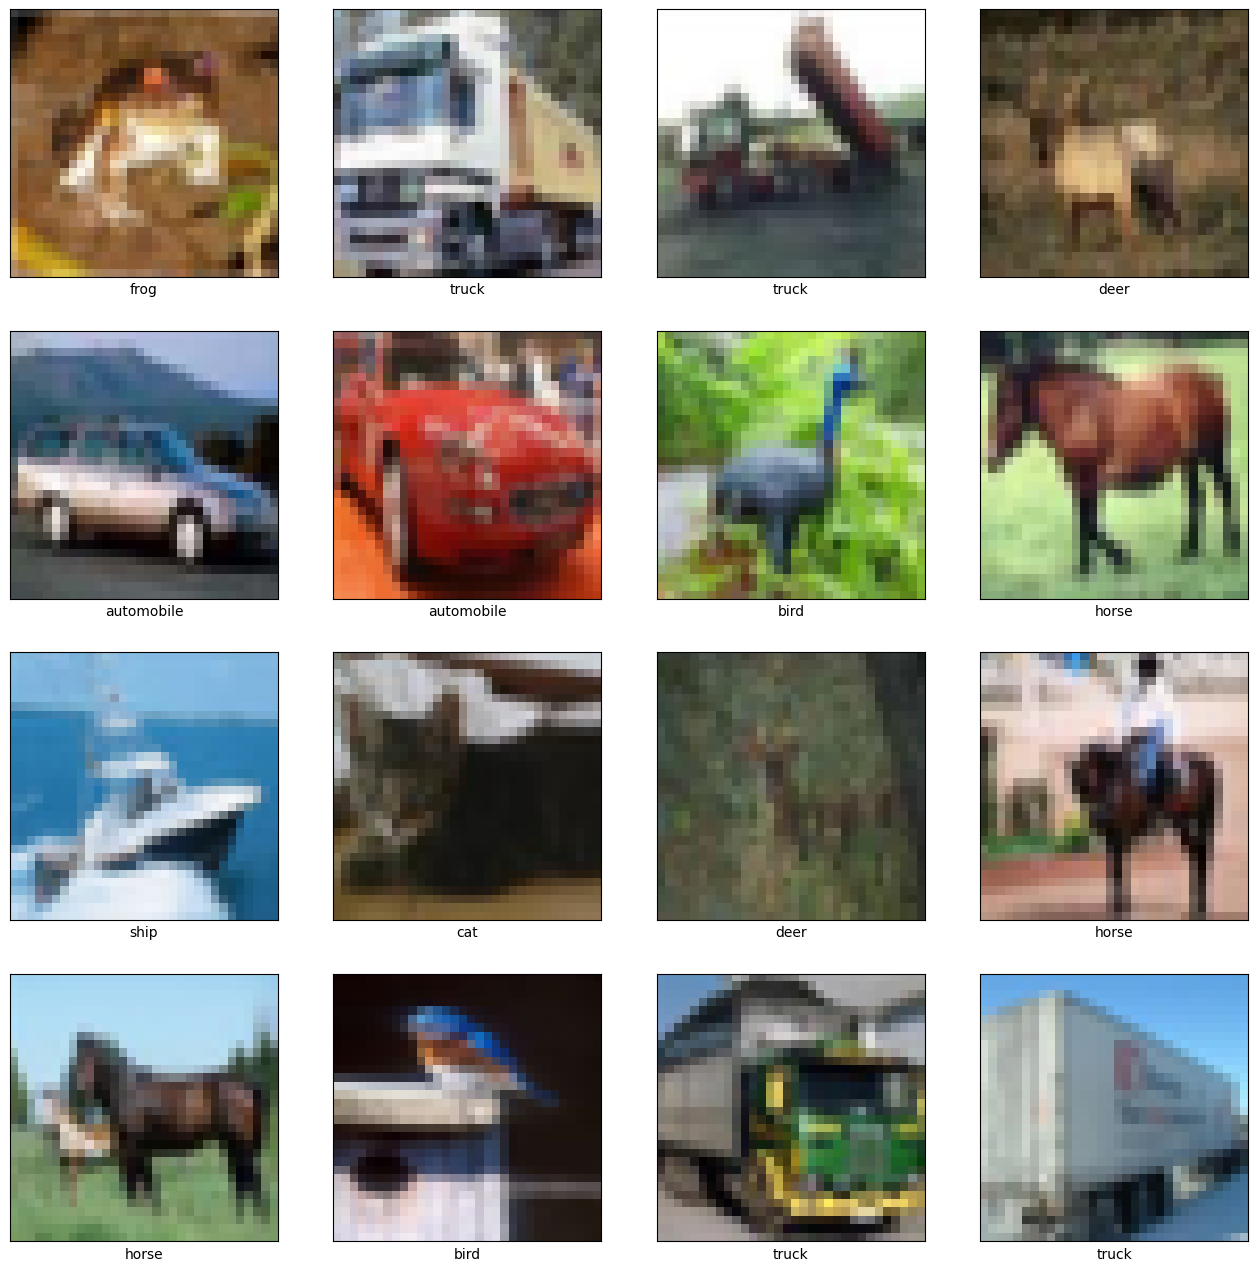

In [ ]:
# To verify that the dataset looks correct, let's plot the first 16 images from the training set and display the class name below each image.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(16,16))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

Next just manually normalise the data:

In [ ]:
# Normalizing
train_images, test_images = train_images / 255.0, test_images / 255.0

## 3.2 Using the built-in Keras code and weights of VGG16


Keras provides access to a number of top-performing pre-trained models that were developed for image recognition tasks.

They are available via the Applications API, and include functions to load a model with or without the pre-trained weights, and prepare data in a way that a given model may expect (e.g. scaling of size and pixel values).

The first time a pre-trained model is loaded, Keras will download the required model weights, which may take some time given the speed of your internet connection.

When loading a given model, the “include_top” argument can be set to False, in which case the model's fully-connected layers and the output layer, will not be loaded, allowing new layers to be added and trained. A model without a 'top' will output activations from the last convolutional or pooling layer directly.
Additionally, when the “include_top” argument is False, the “input_tensor” argument must be specified, allowing the expected fixed-sized input of the model to be changed.

Alternately, we may wish to use the VGG16 model layers, but train the new layers of the model without updating the weights of the VGG16 layers (aka freeze these weights). This will allow the new added layers to learn to interpret the learned features of the VGG16.
This can be achieved by setting the “trainable” property on each of the layers in the loaded VGG model to False prior to training.
You can pick and choose which layers are trainable.


In [ ]:
from keras.applications.vgg16 import VGG16

# load model without classifier layers
# weights = "imagenet" means that the VGG model was pre-trained on the imagenet dataset
model = VGG16(include_top=False, weights="imagenet", input_shape=(32, 32, 3))

### If we want to freeze these pretrained weights:
#for layer in model.layers:
#    layer.trainable = False


# add new classifier layers
# The input to these classifier layers is the output of the last layer of the VGG
# since we loaded the VGG without its fully connected layers, the last layer we use here is the last convolutional layer
flat1 = layers.Flatten()(model.layers[-1].output)
fc1 = layers.Dense(4096, activation='relu')(flat1)
fc2 = layers.Dense(4096, activation='relu')(fc1)
output = layers.Dense(10, activation='softmax')(fc2)


# define new model
model = Model(inputs=model.inputs, outputs=output)

model.compile(tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()



58889256/58889256 [==============================] - 0s 0us/step
Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                            

Epoch 1/10
98/98 [==============================] - 51s 334ms/step - loss: 1.0644 - accuracy: 0.6280 - val_loss: 0.6819 - val_accuracy: 0.7582
Epoch 2/10
98/98 [==============================] - 19s 194ms/step - loss: 0.5810 - accuracy: 0.7991 - val_loss: 0.5926 - val_accuracy: 0.7966
Epoch 3/10
98/98 [==============================] - 19s 195ms/step - loss: 0.4387 - accuracy: 0.8470 - val_loss: 0.5903 - val_accuracy: 0.7977
Epoch 4/10
98/98 [==============================] - 19s 194ms/step - loss: 0.3227 - accuracy: 0.8863 - val_loss: 0.5083 - val_accuracy: 0.8306
Epoch 5/10
98/98 [==============================] - 19s 195ms/step - loss: 0.2386 - accuracy: 0.9169 - val_loss: 0.5142 - val_accuracy: 0.8345
Epoch 6/10
98/98 [==============================] - 19s 193ms/step - loss: 0.1652 - accuracy: 0.9424 - val_loss: 0.5710 - val_accuracy: 0.8300
Epoch 7/10
98/98 [==============================] - 19s 195ms/step - loss: 0.1013 - accuracy: 0.9649 - val_loss: 0.6142 - val_accuracy: 0.8368

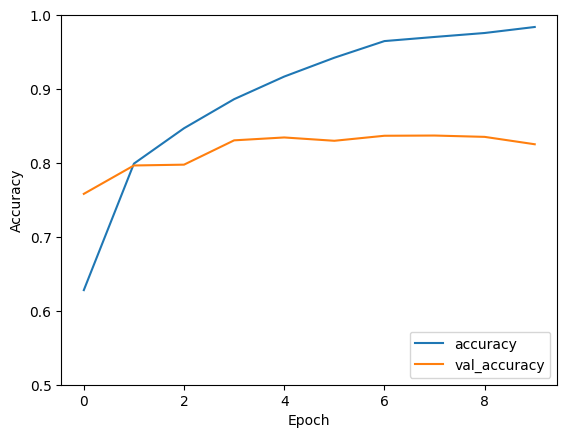

In [ ]:
# Training
history = model.fit(train_images, train_labels, epochs=10, batch_size=512,
                    validation_data=(test_images, test_labels))

# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print(test_acc)

Now let's visualize the prediction using the model you just trained.
First we get the predictions with the model from the test data.
Then we print out 15 images from the test data set, and set the titles with the prediction (and the ground truth label).
If the prediction matches the true label, the title will be green; otherwise it's displayed in red.

313/313 [==============================] - 3s 8ms/step


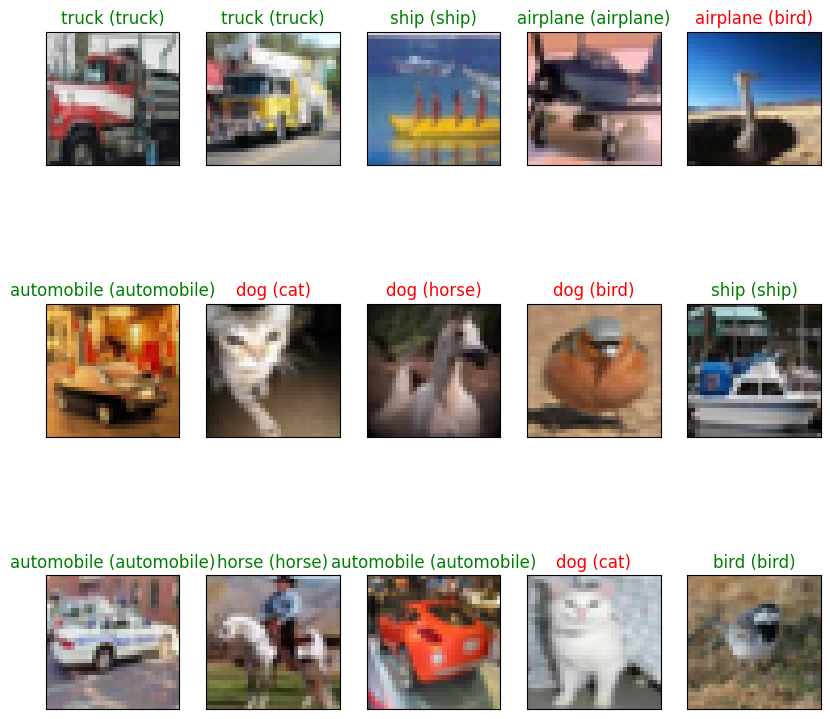

In [ ]:
y_hat = model.predict(test_images)

# Plot a random sample of 15 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(10, 10))
for i, index in enumerate(np.random.choice(test_images.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_images[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = test_labels[index][0]
    # Set the title for each image
    ax.set_title("{} ({})".format(class_names[predict_index],
                                  class_names[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

##3.3 Other state of the art models available from tensorflow


For potential models to use with transfer learning have a look at (you can also find their performance on ImageNet):
https://keras.io/api/applications/

It is worth reading the documentation of the models breifly to make sure they are appropriate for your data and that you are providing everythng in the right format.

In [ ]:
# Here is a non exhaustive list of models you can import from tensorflow
from tensorflow.keras.applications import ResNet101, ResNet101V2, ResNet152, ResNet152V2, Xception, InceptionV3

##3.4 Exercise 4

1. Have a look at the list of [all pre-trained networks for computer vision](https://keras.io/api/applications/) that Keras offers.

2. Choose one of them to fit on the CIFAR10 dataset.

3. Some things to check
  - How does the result compare to VGG16
  - Try freezing some of the pretrained layers. How does this alter the speed and acuracy?
  - Try creating your own CNN to fit CIFAR10, how does this compare to the transfer learning solutions?

In [ ]:
##############################################################
# Your code here
##############################################################

In [ ]:
# load model without classifier layers
# weights = "imagenet" means that the VGG model was pre-trained on the imagenet dataset
model = ResNet101(include_top=False, weights="imagenet", input_shape=(32, 32, 3))

# add new classifier layers
# The input to these classifier layers is the output of the last layer of the VGG
# since we loaded the VGG without its fully connected layers, the last layer we use here is the last convolutional layer
flat1 = layers.Flatten()(model.layers[-1].output)
fc1 = layers.Dense(4096, activation='relu')(flat1)
fc2 = layers.Dense(4096, activation='relu')(fc1)
output = layers.Dense(10, activation='softmax')(fc2)


# define new model
model = Model(inputs=model.inputs, outputs=output)

model.compile(tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()



171446536/171446536 [==============================] - 2s 0us/step
Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 38, 38, 3)            0         ['input_9[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 16, 16, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 16, 16, 64)           256       ['conv1_conv[0][0]']          
 on)                     

Epoch 1/10
98/98 [==============================] - 142s 509ms/step - loss: 1.2463 - accuracy: 0.5705 - val_loss: 41.9984 - val_accuracy: 0.1000
Epoch 2/10
98/98 [==============================] - 35s 356ms/step - loss: 0.5465 - accuracy: 0.8133 - val_loss: 26.0566 - val_accuracy: 0.1000
Epoch 3/10
98/98 [==============================] - 35s 359ms/step - loss: 0.2254 - accuracy: 0.9255 - val_loss: 19.2118 - val_accuracy: 0.1103
Epoch 4/10
98/98 [==============================] - 35s 357ms/step - loss: 0.1208 - accuracy: 0.9606 - val_loss: 4.8693 - val_accuracy: 0.1000
Epoch 5/10
98/98 [==============================] - 34s 348ms/step - loss: 0.0753 - accuracy: 0.9758 - val_loss: 3.6995 - val_accuracy: 0.1279
Epoch 6/10
98/98 [==============================] - 34s 348ms/step - loss: 0.0711 - accuracy: 0.9761 - val_loss: 6.9229 - val_accuracy: 0.1116
Epoch 7/10
98/98 [==============================] - 35s 357ms/step - loss: 0.1197 - accuracy: 0.9591 - val_loss: 5.0850 - val_accuracy: 0.

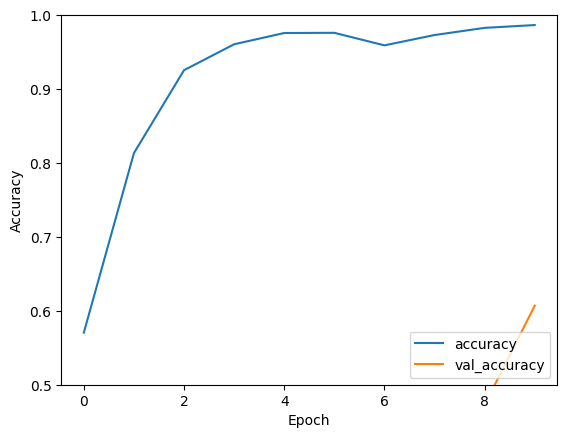

In [ ]:
# Training
history = model.fit(train_images, train_labels, epochs=10, batch_size=512,
                    validation_data=(test_images, test_labels))

# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print(test_acc)

In [ ]:
# Training some more because it seems to be starting to work
history = model.fit(train_images, train_labels, epochs=10, batch_size=512,
                    validation_data=(test_images, test_labels))

Epoch 1/10
98/98 [==============================] - 37s 377ms/step - loss: 0.0403 - accuracy: 0.9869 - val_loss: 1.8826 - val_accuracy: 0.6935
Epoch 2/10
98/98 [==============================] - 34s 346ms/step - loss: 0.0317 - accuracy: 0.9897 - val_loss: 1.5376 - val_accuracy: 0.7466
Epoch 3/10
98/98 [==============================] - 34s 346ms/step - loss: 0.0310 - accuracy: 0.9898 - val_loss: 1.4876 - val_accuracy: 0.7550
Epoch 4/10
98/98 [==============================] - 34s 347ms/step - loss: 0.0297 - accuracy: 0.9898 - val_loss: 1.4915 - val_accuracy: 0.7577
Epoch 5/10
98/98 [==============================] - 34s 346ms/step - loss: 0.0327 - accuracy: 0.9889 - val_loss: 1.5558 - val_accuracy: 0.7530
Epoch 6/10
98/98 [==============================] - 35s 359ms/step - loss: 0.0423 - accuracy: 0.9860 - val_loss: 1.4339 - val_accuracy: 0.7491
Epoch 7/10
98/98 [==============================] - 34s 349ms/step - loss: 0.0322 - accuracy: 0.9890 - val_loss: 1.5186 - val_accuracy: 0.7601

#4. Data Augmentation

For this final section I wanted to show you how you can include data augmentation in your model pipelines. Data augmentation means that you apply various random transformations to all of your data as you load it into the neural network. This allows you to effectively increase the size of your dataset and should help your network generalise better to new data and hopefully prevent overfitting.

That said, it is not a silver bullet - don't think you can entirely beat issues of low numerosity this way, as having truly new data will still be better for your network than using using augmented data, as while your augmentations give more variation to learn, it is still all built upon a single example.

The way I'm going to include data augmentation is by creating a special preprocessing layer in the model, however an alternate way of inclduding aumentation is to use [data generators](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) and embed the augmentation in the generation process (you can look into this in your own time).



In [ ]:
# We'll use the shape dataset again for this example
# This cell should all be familliar for loading and splitting the shapes data.

# don't forget to load and unzip the shapes data if you haven't already
# Load metadata from the CSV file - this allows us to know what class each picture belongs to.
metadata = pd.read_csv("shapes_dataset_meta/metadata.csv")

# Define the directory where your images are located (in colab in our case)
image_directory = "shapes_dataset_meta/shapes"

# Define image size - this means we can rescale all our images to be the same size
image_size = (100, 100)

# Create lists to store image data and labels
images = []
labels = []

# Load and preprocess images
for index, row in metadata.iterrows():
    image_path = os.path.join(image_directory, row['image_name'])
    image = load_img(image_path, target_size=image_size)
    image_array = img_to_array(image) / 255.0  # Normalize pixel values to [0, 1]
    images.append(image_array)
    labels.append(row['class_label'])


class_mapping = {'square': 0, 'circle': 1, 'triangle': 2}
labels = [class_mapping[label] for label in labels]


images = np.array(images)
labels = np.array(labels)


# Split the data into training and validation sets
X_non_test, X_test, y_non_test, y_test = train_test_split(images, labels, test_size=1/10, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_non_test, y_non_test, test_size=1/9, random_state=42)

Below I have constructed a simple CNN that starts with a preprocessing layer. You can read about all of the differnt augmentation options [here](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing), but I have summarised their effect below if you want to experiment with them.

In [ ]:
desired_image_size = (100, 100)
inputs = keras.Input(shape=desired_image_size + (3,))

from tensorflow.keras.layers.experimental import preprocessing
##  RandomContrast: Adjust the contrast of an image or images by a random factor.
##  RandomCrop: Randomly crop the images to target height and width.
##  RandomFlip: Randomly flip each image horizontally and vertically.
##  RandomHeight: Randomly vary the height of a batch of images during training.
##  RandomRotation: Randomly rotate each image.
##  RandomTranslation: Randomly translate each image during training.
##  RandomWidth: Randomly vary the width of a batch of images during training.
##  RandomZoom: Randomly zoom each image during training.
##  Rescaling: Multiply inputs by scale and adds offset.
##  Resizing: Image resizing layer.

# for specific details on the preprocessing layers have a look here: https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing
data_augmentation = keras.Sequential(
    [
        preprocessing.RandomFlip("horizontal"),
        preprocessing.RandomRotation(0.1),
        preprocessing.RandomZoom(0.1),
    ]
)


x = data_augmentation(inputs)

x = layers.Rescaling(1.0 / 255, offset=0)(x)
x = layers.Conv2D(64, (3, 3), padding = 'SAME')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), padding = 'SAME')(x)
x = layers.MaxPooling2D((2, 2))(x)
# flatten the output first
x = layers.Flatten()(x)
x = layers.Dense(1000, activation='relu')(x)
outputs = layers.Dense(3, activation="softmax")(x)

model = Model(inputs, outputs)

# as metric we choose the accuracy: the total number of correct predictions made
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


Epoch 1/200
8/8 [==============================] - 5s 89ms/step - loss: 1.1076 - accuracy: 0.3713 - val_loss: 1.1085 - val_accuracy: 0.3000
Epoch 2/200
8/8 [==============================] - 1s 67ms/step - loss: 1.1106 - accuracy: 0.3113 - val_loss: 1.1027 - val_accuracy: 0.3200
Epoch 3/200
8/8 [==============================] - 1s 64ms/step - loss: 1.0961 - accuracy: 0.3363 - val_loss: 1.1008 - val_accuracy: 0.3000
Epoch 4/200
8/8 [==============================] - 1s 64ms/step - loss: 1.0801 - accuracy: 0.3850 - val_loss: 1.0512 - val_accuracy: 0.4800
Epoch 5/200
8/8 [==============================] - 0s 64ms/step - loss: 1.0220 - accuracy: 0.4688 - val_loss: 0.9980 - val_accuracy: 0.4600
Epoch 6/200
8/8 [==============================] - 0s 63ms/step - loss: 0.9889 - accuracy: 0.4512 - val_loss: 0.9020 - val_accuracy: 0.5400
Epoch 7/200
8/8 [==============================] - 0s 64ms/step - loss: 0.9189 - accuracy: 0.5275 - val_loss: 0.8482 - val_accuracy: 0.5400
Epoch 8/200
8/8 [===

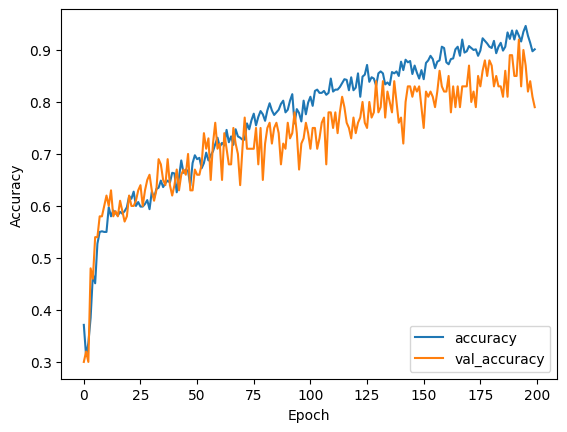

In [ ]:
# Training

history = model.fit(X_train, y_train, epochs=200, batch_size=100, validation_data=(X_valid, y_valid))

# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

Bonus task: Try seeing what impact different preprocessing has on the results. Update the architecture used here to that of your best model you found in Exercise 2 and see how how accuracy changes when you add image augmentation.

Bonus task: Try going back to some of the other exercises and add data aumentation to see if it improves model performance.